# Coding in Python: Dos and Don’ts

### Content

1. [Clean Code](#Chapter1)
2. [Commenting & Documenting](#Chapter2)
3. [Exception Handling and Logging](#Chapter3)
4. [Importing](#Chapter4)
5. [How to structure a method](#Chapter5)
6. [Debugging](#Chapter6)

##  1. <a id='Chapter1'> Clean Code </a>

**A few basic principles:**

* Follow the [PEP 8](https://www.python.org/dev/peps/pep-0008/) Style Guide. It contains, among others, recommendations on:
    * code layout 
    * basic naming conventions 
    * programming recommendations
    * commenting (in detail described in Chapter 4)
    * varia
* Perform a static code analysis - or: PyLint is your friend
* Follow the best practices of _Correctness - Tightness -  Readability_
* Adhere to principles of pythonic coding (idiomatic coding, the "python way")

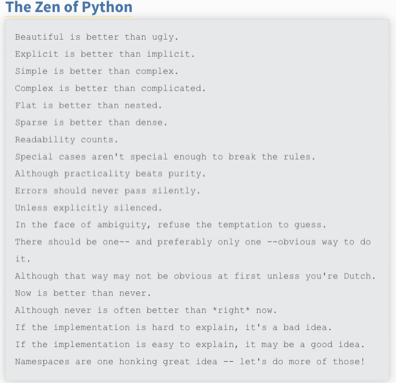

### PEP 8 Quickie: Code Layout

* _Indentation_: 4 spaces per level. For continuation lines, decide between vertical alignment & hanging indentation as shown here:
 <pre><code>
    # Vertically aligned with opening delimiter.
    foo = long_function_name(var_one, var_two,
                             var_three, var_four)

    # Hanging indentation (4 additonal spaces)
    def very_very_long_function_name(
            var_one, var_two, var_three,
            var_four):
        print(var_one)
  </code></pre>
* _Line limit_: maximum of 79 characters (docstrings & comments 72).
* _Blank lines_: 
    * **Two**: Surround top-level function and class definitions; 
    * **One:** Surround Method definitions inside a class 
    * **Several:** may be used (sparingly) to separate groups of related functions
    * **None:** Blank lines may be omitted between a bunch of related one-liners (e.g. a set of dummy implementations).
* _Whitespaces_: 
    * **None** immediately inside parentheses, brackets or braces; after trailing commas; for keyword assignments in functions. 
    * **Do** for assignments (`i = i + 1`), around comparisons (`>=`, `==`, etc.), around booleans (`and`, `or`, `not`) 
    <pre><code>
    # the following 3 examples are correct:
    spam(ham[1], {eggs: 2})
    if x == 4: print x, y; x, y = y, x
    def complex(real, imag=0.0):
 </code></pre>
* There's more in the PEP 8 guide!

### PEP 8 Quickie: Basic Naming Conventions
**A short typology:** <br>
b (single lowercase letter); B (single uppercase letter); lowercase; lower_case_with_underscores; UPPERCASE; UPPER_CASE_WITH_UNDERSCORES; CapitalizedWords (or CapWords, or CamelCase); mixedCase; Capitalized_Words_With_Underscores (ugly!)

**A few basic rules:** <br>
- packages and modules: short, all-lowercase names. Underscores can be used in the module name if it improves readability. E.g. `numpy`, `climada`
- classes: use the CapWords convention. E.g. `RiverFlood`
- functions, methods and variables: lowercase, with words separated by underscores as necessary to improve readability. E.g. `set_raster()`, `dst_meta`
- function- and method arguments: Always use `self` for the first argument to instance methods,`cls` for the first argument to class methods.
- constants: all capital letters with underscores, e.g. `DEF_VAR_EXCEL`

**Use of underscores** <br>
- `_single_leading_underscore`: weak "internal use" indicator. E.g. `from M import *` does not import objects whose names start with an underscore.
    A side-note to this: Always decide whether a class's methods and instance variables (collectively: "attributes") should be public or non-public. If in doubt, choose non-public; it's easier to make it public later than to make a public attribute non-public. Public attributes are those that you expect unrelated clients of your class to use, with your commitment to avoid backwards incompatible changes. Non-public attributes are those that are not intended to be used by third parties; you make no guarantees that non-public attributes won't change or even be removed. Public attributes should have no leading underscores. 
- `single_trailing_underscore_`: used by convention to avoid conflicts with Python keyword, e.g. `tkinter.Toplevel(master, class_='ClassName')`
- `__double_leading_and_trailing_underscore__`: "magic" objects or attributes that live in user-controlled namespaces. E.g. `__init__`, `__import__` or `__file__`. Never invent such names; only use them as documented.

There are many more naming conventions, some a bit messy. Have a look at the PEP8 style guide for more cases.

### PEP 8 Quickie: Programming Recommendations

* comparisons to singletons like `None` should always be done with `is` or `is not`, never the equality operators.
* Use `is not` operator rather than `not ... is`.
* Be consistent in return statements. Either all return statements in a function should return an expression, or none of them should. Any return statements where no value is returned should explicitly state this as `return None`.
 <pre><code>
# Correct
def foo(x):
    if x >= 0:
        return math.sqrt(x)
    else:
        return None
# Wrong
def foo(x):
    if x >= 0:
        return math.sqrt(x)
 </code></pre>
 
* Object type comparisons should always use isinstance() instead of comparing types directly: 
 <pre><code>
# Correct: 
if isinstance(obj, int):
# wrong:
if type(obj) is type(1)
</code></pre>

* Remember: sequences (strings, lists, tuples) are false if empty; this can be used: 
 <pre><code>
# Correct:
if not seq:
if seq:
# Wrong:
if len(seq):
if not len(seq)
 </code></pre>
 
* Don't compare boolean values to True or False using `==`:
 <pre><code>
# Correct:
if greeting: 
# Wrong:
if greeting == True: 
 </code></pre>

* Use ''.startswith() and ''.endswith() instead of string slicing to check for prefixes or suffixes.
 <pre><code>
# Correct:
if foo.startswith('bar'):
# Wrong:
if foo[:3] == 'bar':
 </code></pre>


**--> did not mention anything about exception handling which was treated in the PEP8 guide under this section.**

**--> did not mention anything about context managers which was treated in the PEP8 guide under this section**

### Static Code Analysis and PyLint

Static code analysis detects style issues, bad practices, potential bugs, and other quality problems in your code, all without having to actually execute it. In Spyder, this is powered by the best in class Pylint back-end, which can intelligently detect an enormous and customizable range of problem signatures. It follows the style recommended by PEP 8 and  also includes the following features:
Checking the length of each line, checking that variable names are well-formed according to the project's coding standard, checking that declared interfaces are truly implemented.
<br><br>
A detailed instruction can be found [here](http://docs.spyder-ide.org/current/pylint.html).<br>
<br><br>
In brief:<br>
In the editor, select the Code Analysis pane (if not visible, go to View -> Panes -> Code Analysis) and the file you want to be analysed; hit the Analyse button.
<br>
The output will look somewhat similar to that: 
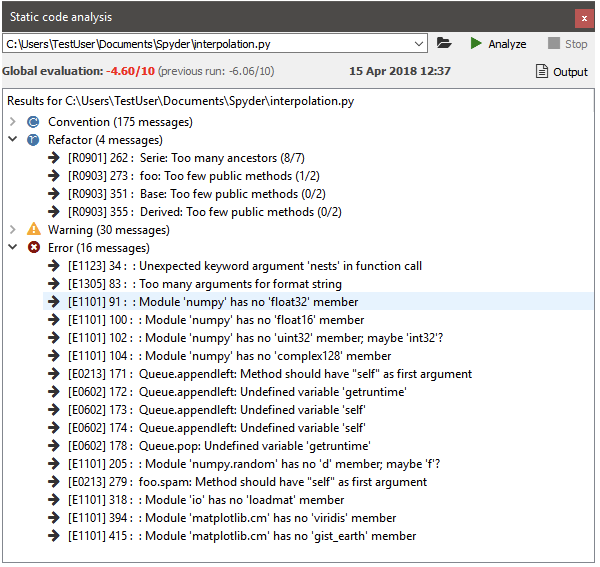

There are 4 categories in the analysis output: _convention_, _refactor_, _warning_, _error_ and a global score regarding code quality. All messages have a line reference and a short description on the issue. Errors _must_ be fixed, as this is a no-go for actually executing the script. Warnings and refactoring messages should be taken seriously; so should be the convention messages, even though some of the naming conventions etc. may not fit the project style. This is configurable. 
<br><br>
In general, there should be no errors and warnings left, and the overall code quality should be in the "green" range (somewhere above 5 or so).

**--> did not mention how to further configure pylint**

### A few more best practices

**Correctness**

Methods and functions must return correct and verifiable results, not only under the best circumstances but in any possible context.
I.e. ideally there should be unit tests exploring the full space of parameters, configuration and data states.
This is often clearly a non-achievable goal, but still - we aim at it.

**Tightness**

- Avoid code redundancy.
- Make the program efficient, use profiling tools for detection of bottlenecks.
- Try to minimize memory consumption.
- Don't introduce new dependencies (library imports) when the desired functionality is already covered by existing dependencies.
- Stick to already supported file types.

**Readability**

- Write complete Python Docstrings.
- Use meaningful method and parameter names, and always annotate the data types of parameters and return values.
- No context-dependent return types! Also: Avoid `None` as return type, rather raise an Exception instead.
- Be generous with defining Exception classes.
- Comment! Comments are welcome to be redundant.
  And whenever there is a particular reason for the way something is done, comment on it! See below for more detail.
- For functions which implement mathematical/scientific concepts, add the actual mathematical formula as comment or
  to the Doctstrings. This will help maintain a high level of scientific accuracy. E.g. How is are the random walk
  tracks computed for tropical cyclones?

### Pythonic Code
--> Typical python structures?dictionaries, tuples, lists, iterators / iterables and generators (the latter only as a side note potentially with ref to https://treyhunner.com/2018/06/how-to-make-an-iterator-in-python/#Generators:_the_easy_way_to_make_an_iterator and stating that they can be very useful for code performance, avoiding to read in / return huge iterables at once)? <br>
--> f-strings? <br>
--> lambda functions <br>
--> for loops <br>
--> type checking in python (variable should not change type, mutable default parameters are banned) <br>
--> list comprehension<br>
--> decorators <br>

**Some of the stuff should be assumed that people know already.**

A good overview on crucial "pythonic" structures and methods can be found in the python 101 library: https://python101.pythonlibrary.org/

## 2. <a id='Chapter2'> Commenting & Documenting </a>

_Comments_ are for developers. They describe parts of the code where necessary to facilitate the understanding of programmers. They are marked by putting a `#` in front of every comment line (for multi-liners, wrapping them inside triple double quotes `"""` is basically possible, but discouraged to not mess up with docstrings).<br>
A _documentation string (docstring)_ is a string that describes a module, function, class, or method definition. The docstring is a special attribute of the object (`object.__doc__`) and, for consistency, is surrounded by triple double quotes (`"""`).

**A few general rules:**

* Have a look at this blog-post on [commenting basics](https://realpython.com/python-comments-guide/#python-commenting-basics)
* Comments should be D.R.Y (“Don’t Repeat Yourself.”)
* Obvious naming conventions can avoid unnecessary comments (cf. `families_by_city[city]` vs. `my_dict[p]`)
* comments should rarely be longer than the code they support
* All public methods need a doc-string. See below for details on the convention used within the climada project.
* Non-public methods that are not immediately obvious to the reader should at least have a short comment after the def line: 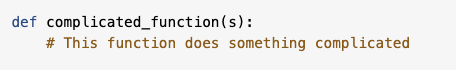 

**Numpy-style docstrings**<br>
Full reference can be found [here](https://numpydoc.readthedocs.io/en/latest/format.html#docstring-standard). The standards are such that they use re-structured text (reST) syntax and are rendered using Sphinx.

There are several sections in a docstring, with headings underlined by hyphens (`---`). The sections of a function’s docstring are:

1. _Short summary_: <br>
    A one-line summary that does not use variable names or the function name
    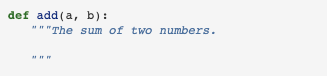
    
2. _Deprecation warning_ (use if applicable):<br>
    to warn users that the object is deprecated, including version the object that was deprecated, and when it will be removed, reason for deprecation, new recommended way of obtaining the same functionality. Use the `deprecated` Sphinx directive: 
    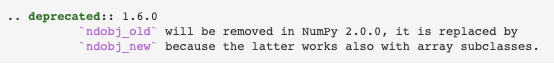
    
3. _Extended Summary_: <br>
    A few sentences giving an extended description to clarify functionality, not to discuss implementation detail or background theory (see `Notes` section below!)
    
4. _Parameters_: <br>
    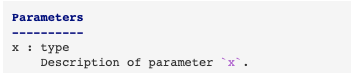
    Description of the function arguments, keywords and their respective types. <br>
    Enclose variables in single backticks in the description. The colon must be preceded by a space, or omitted if the type is absent. <br>
    For the parameter types, be as precise as possible. <br>
    If it is not necessary to specify a keyword argument, use `optional` after the type specification: e.g. `x: int, optional`. Default values of optional parameters can also be detailed in the description. (e.g. `... description of parameter ... (default is -1)`)
    
5. _Returns_: <br>
    Explanation of the returned values and their types. Similar to the Parameters section, except the name of each return value is optional, type isn't. If both the name and type are specified, the Returns section takes the same form as the Parameters section.
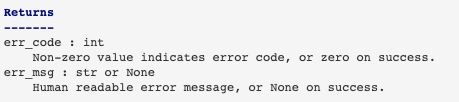

There is a range of other sections that can be included, if sensible and applicable, such as `Yield` (for generator functions only), `Raises` (which errors get raised and under what conditions), `See also` ( refer to related code), `Notes` (additional information about the code, possibly including a discussion of the algorithm; may include mathematical equations, written in LaTeX format), `References`, `Examples`(to illustrate usage).

## 3. <a id='Chapter3'> Exception Handling and Logging </a>

--> Proposition on how to raise & catch errors and other exceptions.

--> Propostion on how to log: what to log, what logging level for what issue, how to turn logging on & off



## 4. <a id='Chapter4'> Importing </a>

**General remarks** <br>
* Imports should be grouped in the following order:
    - Standard library imports (such as `re`, `math`, `datetime`, cf. [here](https://docs.python.org/3/library/) )
    - Related third party imports (such as `numpy`)
    - Local application/library specific imports (such as `climada.hazard.base`)
* You should put a blank line between each group of imports.
* Don't introduce new dependencies (library imports) when the desired functionality is already covered by existing dependencies.

**Avoid circular importing!!** <br>
Circular imports are a form of circular dependencies that are created with the import statement in Python; e.g. module A loads a method in module B, which in turn requires loading module A. This can generate problems such as tight coupling between modules, reduced code reusability, more difficult maintainance. Circular dependencies can be the source of potential failures, such as infinite recursions, memory leaks, and cascade effects. <br>
Generally, they can be resolved with better code design. <br>
Have a look [here](https://stackabuse.com/python-circular-imports/) for tips to identify and resolve such imports. 

**--> absolute and relative imports?**

## 5. <a id='Chapter5'> How to structure a method </a>

**--> Separate algorithmic computations and data curation**

**--> max method length and how to divide methods into single purpose pieces.**

**--> what about "how to structure a module" / how to structure a class** general overview on projects: https://python-docs.readthedocs.io/en/latest/writing/structure.html

for functions specifically: https://realpython.com/defining-your-own-python-function/

## 6. <a id='Chapter6'> Debugging </a>

Specifically: https://docs.spyder-ide.org/3/debugging.html#debugging-with-ipdb
